# PyTorch: Cost vs Epochs

Constants:
- $\sigma = 1.0$
- $y=-0.77x-3.26+noise(\sigma)$, i.e. $m=-0.77$ and $b=-3.26$
- $n=10$
- $x_{max} - x_{min} = 20$

## Import libraries

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Define inputs and targets

In [ ]:
x = torch.linspace(-10., 10., steps=10)
y = -0.77*x -3.26 + torch.normal(mean=torch.zeros(10), std=1.0)

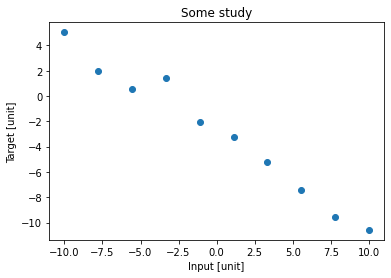

In [ ]:
fig, ax = plt.subplots()
plt.title("Some study")
plt.xlabel("Input [unit]")
plt.ylabel("Target [unit]")
ax.scatter(x, y)
plt.show()

## Define some helper functions

In [ ]:
def regression(my_x, my_m, my_b):
  return my_m * my_x + my_b

In [ ]:
def mse(my_y_hat, my_y):
  mse_cost = (1/(len(my_y))) * torch.sum((my_y_hat - my_y)**2)
  return mse_cost

In [ ]:
def regression_plot(my_x, my_y, my_m, my_b): 
  fig, ax = plt.subplots()
  ax.scatter(my_x, my_y)
  x_min, x_max = ax.get_xlim()
  y_min = regression(x_min, my_m, my_b)
  y_max = regression(x_max, my_m, my_b)
  ax.set_xlim([x_min, x_max])
  _ = ax.plot([x_min, x_max], [y_min, y_max])

In [ ]:
def cost_epoch_plot(my_epochs, my_costs): 
  fig, ax = plt.subplots()
  ax.plot(my_epochs, my_costs)
  x_min, x_max = ax.get_xlim()
  plt.title("MSE as func. of #Epochs")
  plt.xlabel("#Epochs")
  plt.ylabel("Cost (MSE)")
  plt.show()

## Machine Learning

Epoch 0, Cost 103, m grad 120, b grad 7.62
Epoch 1, Cost 17.6, m grad 22.2, b grad 7.47
Epoch 2, Cost 14.1, m grad 4.1, b grad 7.32
Epoch 3, Cost 13.5, m grad 0.76, b grad 7.18
Epoch 4, Cost 13, m grad 0.141, b grad 7.03
Epoch 5, Cost 12.5, m grad 0.0261, b grad 6.89
Epoch 6, Cost 12, m grad 0.00483, b grad 6.75
Epoch 7, Cost 11.5, m grad 0.000889, b grad 6.62
Epoch 8, Cost 11.1, m grad 0.000168, b grad 6.49
Epoch 9, Cost 10.7, m grad 3.19e-05, b grad 6.36
Epoch 10, Cost 10.3, m grad 6.91e-06, b grad 6.23
Epoch 11, Cost 9.91, m grad 2.62e-06, b grad 6.11
Epoch 12, Cost 9.54, m grad 2.62e-06, b grad 5.98
Epoch 13, Cost 9.19, m grad 2.15e-06, b grad 5.86
Epoch 14, Cost 8.85, m grad 2.86e-06, b grad 5.75
Epoch 15, Cost 8.52, m grad 2.15e-06, b grad 5.63
Epoch 16, Cost 8.21, m grad 1.43e-06, b grad 5.52
Epoch 17, Cost 7.9, m grad 1.91e-06, b grad 5.41
Epoch 18, Cost 7.61, m grad 2.15e-06, b grad 5.3
Epoch 19, Cost 7.34, m grad 3.34e-06, b grad 5.19
Epoch 20, Cost 7.07, m grad -5.25e-06, b 

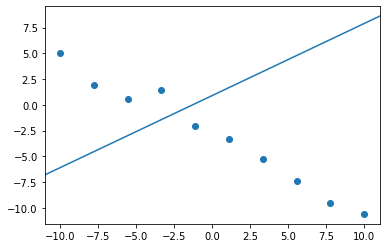

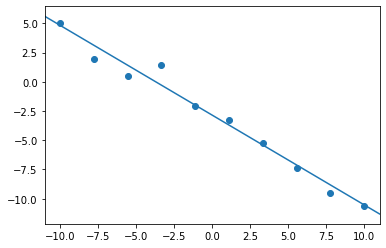

In [ ]:
m = torch.tensor([0.7]).requires_grad_()
b = torch.tensor([0.9]).requires_grad_()
optimizer = torch.optim.SGD([m, b], lr=0.01)
regression_plot(x, y, m, b)

epochs = 200 # train over entire dataset 200 times
epoch_data = {"Epoch":[],
              "Cost":[],
              "m_grad":[],
              "m":[],
              "b_grad": [],
              "b":[]}

for epoch in range(epochs):
  optimizer.zero_grad() # reset gradients to zero, else they accumulate
  # Step 1: calculate y_hat using our regression model
  y_hat = regression(x, m, b)
  # Step 2: calculate cost using y_hat and y
  C = mse(y_hat, y) 
  # Step 3: use autodiff to calculate slope of cost w.r.t. parameters m & b
  C.backward() 
  # Step 4: adjust model parameters m & b by small step (lr=0.01) in direction told by slopes from step 3
  optimizer.step() 
  print("Epoch {}, Cost {}, m grad {}, b grad {}".format(
      epoch,
      "%.3g" % C.item(),
      "%.3g" % m.grad.item(),
      "%.3g" % b.grad.item()
  ))
  epoch_data["Epoch"].append(epoch+1)
  epoch_data["Cost"].append(C.item())
  epoch_data["m_grad"].append(m.grad.item())
  epoch_data["m"].append(m.item())
  epoch_data["b_grad"].append(b.grad.item())
  epoch_data["b"].append(b.item())

regression_plot(x, y, m, b)

## Check if $m$ and $b$ are close to non-noisy parameters

In [ ]:
m.item()

-0.768630862236023

In [ ]:
b.item()

-2.845250368118286

## Plot cost against epochs

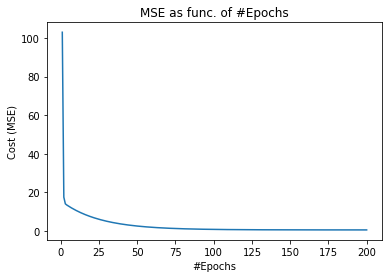

In [ ]:
cost_epoch_plot(epoch_data["Epoch"], epoch_data["Cost"])